In [194]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [195]:
from pathlib import Path
path = Path.cwd()/ 'drive' / 'My Drive' / 'Colab Notebooks' / 'physics.csv'
print(path)

/content/drive/My Drive/Colab Notebooks/physics.csv


In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
from nltk import FreqDist
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

import warnings
warnings.filterwarnings('ignore')

pd.set_option('max_colwidth', 100)

In [197]:

data = pd.read_csv(path)
data.columns
print(data)

                                                                                               Questions  ...                  Topic
0    A student measures the time period of 100 oscillations of a simple pendulum four times. The data...  ...   waves_thermodynamics
1     A particle of mass m is moving along the side of a square of side ‘a’, with a uniform speed v i...  ...              mechanics
2     A point particle of mass m, moves along the uniformly rough track PQR as shown in the figure. T...  ...              mechanics
3    A person trying to lose weight by burning fat lifts a mass of 10 kg upto a height of 1 m 1000 ti...  ...              mechanics
4    A roller is made by joining together two cones at their vertices O. It is kept on two rails AB a...  ...              mechanics
..                                                                                                   ...  ...                    ...
115  Assuming human pupil to have a radius of 0.25 cm and a comfortab

In [198]:
data.Year.dtype
data.Year

0      2016
1      2016
2      2016
3      2016
4      2016
       ... 
115    2015
116    2015
117    2015
118    2015
119    2015
Name: Year, Length: 120, dtype: int64

In [199]:
data.head()

,Questions,Year,Topic
0,A student measures the time period of 100 oscillations of a simple pendulum four times. The data...,2016,waves_thermodynamics
1,"A particle of mass m is moving along the side of a square of side ‘a’, with a uniform speed v i...",2016,mechanics
2,"A point particle of mass m, moves along the uniformly rough track PQR as shown in the figure. T...",2016,mechanics
3,A person trying to lose weight by burning fat lifts a mass of 10 kg upto a height of 1 m 1000 ti...,2016,mechanics
4,A roller is made by joining together two cones at their vertices O. It is kept on two rails AB a...,2016,mechanics


# Data Preprocessing

### Data Preprocessing Pipelines
![Data Preprocessing Pipeline](https://miro.medium.com/max/976/1*vXpUaBPZRZtAsciMXllmkQ.png)

---



---



In [0]:

# from sklearn.utils import shuffle
# from sklearn.utils import shuffle
# data = shuffle(data)
# data = data.sample(frac=1, replace = True, random_state = 1)
# data.head()

In [201]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import re

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def preprocess(document):
  document = str(document)
  document = document.lower()
  # document = re.sub('\W\D',' ', document)
  words = word_tokenize(document)
  # r = compile('\W\D')
  # words = [word for word in words if not r.match(word)]
  words = [lemmatizer.lemmatize(stemmer.stem(word)) for word in words if word not in stopwords.words('english')]
  

  document = str(" ".join(words))

  return document

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [202]:
print(data.Topic.unique())
print(data.Year.unique())

['waves_thermodynamics' 'mechanics' 'electricity_magnetism' 'optics'
 'modern_physics']
[2016 2017 2018 2015]


In [203]:
questions = [question for question in data.Questions]
print(questions[1:3])

[' A particle of mass m is moving along the side of a square of side ‘a’, with a uniform speed v in the x-y plane as shown in the figure : Which of the following statements is false for the angular momentum ® L about the origin  ', ' A point particle of mass m, moves along the uniformly rough track PQR as shown in the figure. The coefficient of friction, between the particle and the rough track equals μ. The particle is released, from rest, from the point P and it comes to rest at a point R. The energies, lost by the ball, over the parts, PQ and QR, of the track, are equal to each other, and no energy is lost when particle changes direction from PQ to QR. The values of the coefficient of friction μ and the distance x(=QR), are, respectively close to  ']


In [204]:
# preprocess questions using the preprocess function
questions = [preprocess(question) for question in questions]
print(questions[1:3])
len(questions)

['particl mass move along side squar side ‘ ’ , uniform speed v x-i plane shown figur : follow statement fals angular momentum ® l origin', 'point particl mass , move along uniformli rough track pqr shown figur . coeffici friction , particl rough track equal μ. particl releas , rest , point p come rest point r. energi , lost ball , part , pq qr , track , equal , energi lost particl chang direct pq qr . valu coeffici friction μ distanc x ( =qr ) , , respect close']


120

In [205]:
# type(data.Questions)
questions = pd.DataFrame(questions)
# questions.head()
data['Questions'] = questions
data.head()

,Questions,Year,Topic
0,"student measur time period 100 oscil simpl pendulum four time . data set 90 , 91 , 95 92 s. mini...",2016,waves_thermodynamics
1,"particl mass move along side squar side ‘ ’ , uniform speed v x-i plane shown figur : follow sta...",2016,mechanics
2,"point particl mass , move along uniformli rough track pqr shown figur . coeffici friction , part...",2016,mechanics
3,person tri lose weight burn fat lift mass 10 kg upto height 1 1000 time . assum potenti energi l...,2016,mechanics
4,"roller made join togeth two cone vertic o. kept two rail ab cd place asymmetr ( see figur ) , ax...",2016,mechanics


# Feature Engineeing




In [0]:
# Tfidf vectorization
vectorizer = TfidfVectorizer()  
tfidf_model = vectorizer.fit_transform(data['Questions'])

In [0]:
questions_tfidf = pd.DataFrame(tfidf_model.toarray(), columns= vectorizer.get_feature_names())

In [208]:
questions_tfidf.head()

,01,02,03h,08c,10,100,1000,1010,1012,1023,1028,103,105,107,108,12,13,15,150,15v,170,178c,18,1μf,20,200,208c,220,240,25,25th,27,278c,2m,2μf,30,300,308c,32,320,...,want,watch,water,watt,wattle,wave,wavelength,way,weight,weld,well,wheatston,whistl,whose,width,wire,withstand,work,would,wrist,wt,yellow,young,z0,zero,δωm,ιn,λ1,λ2,λa,λb,λg,λmin,λn,μf,μm,νl,ωc,ωm,ωo
0,0.0,0.0,0.0,0.0,0.000000,0.162487,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.081409,0.000000,0.136566,0.0,0.0,0.0,0.0,0.0,0.0,0.148355,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.101562,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.256404,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.121714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [209]:
column_name = questions_tfidf.columns
# column_name[:70]
questions_tfidf.drop(list(column_name[:70]), inplace=True, axis=1)
questions_tfidf.head()

,ac,acceler,accuraci,achiev,across,act,action,ad,addit,adiabat,air,along,alpha,altern,aluminium,am2,ammet,amount,amplifi,amplitud,angl,angular,anoth,appear,appli,ar,arc,area,around,arrang,assum,asymmetr,atmospher,atom,attract,audio,avagadro,avail,averag,away,...,want,watch,water,watt,wattle,wave,wavelength,way,weight,weld,well,wheatston,whistl,whose,width,wire,withstand,work,would,wrist,wt,yellow,young,z0,zero,δωm,ιn,λ1,λ2,λa,λb,λg,λmin,λn,μf,μm,νl,ωc,ωm,ωo
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.266671,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.250339,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.117752,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.116413,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.256404,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.121714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.117435,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.117435,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
# questions_tfidf.columns
# import seaborn as sns
# sns.set(style="darkgrid")
# titanic = sns.load_dataset("data")
# ax = sns.countplot(x=data["Questions"], data=titanic)
import matplotlib.pyplot as plt
import seaborn as sns
def plot_word_frequency(words, top_n=10):
    word_freq = FreqDist(words)
    labels = [element[0] for element in word_freq.most_common(top_n)]
    counts = [element[1] for element in word_freq.most_common(top_n)]
    # plt.figure(figsize=(15,12))
    plot = sns.barplot(labels, counts)
    return plot




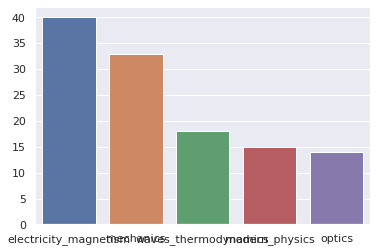

In [211]:
words = list(data.Topic)
string = " ".join(words)
string = string.lower()
plot_words = string.split()
plot_word_frequency(plot_words, 15)

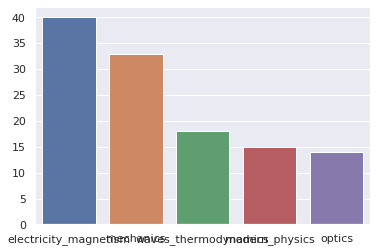

In [212]:

no_stop = [word for word in plot_words if word not in stopwords.words('english')]
plot_word_frequency(no_stop,8)

<img src=""/>

In [213]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

train_x, valid_x, train_y, valid_y = train_test_split(data['Questions'], data['Topic'], random_state=100)

# label encode the target variable here it is topic
encoder = LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)
np.unique(train_y)

array([0, 1, 2, 3, 4])

# Count Vectors as features

In [0]:
# create a CountVectorizer object
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
count_vect.fit(data['Questions'])

# transform the training and validation data using count vectorizer object
xtrain_count = count_vect.transform(train_x)
xvalid_count = count_vect.transform(valid_x)

In [215]:
print(type(xtrain_count))
print(xtrain_count.shape)

<class 'scipy.sparse.csr.csr_matrix'>
(90, 867)


# Tf-Idf Vectors as features
![tf_idf](https://skymind.ai/images/wiki/tfidf.png)


---



---



In [0]:
# word level tf-idf

tfidf_vect = TfidfVectorizer(analyzer = 'word', token_pattern='w{1,}', max_features = 1000)
tfidf_vect.fit(data['Questions'])

xtrain_tfidf = tfidf_vect.transform(train_x)
xvalid_tfidf = tfidf_vect.transform(valid_x)


# ngram level tf-idf
tfidf_vect_ngram = TfidfVectorizer(analyzer = 'word', token_pattern = '\w{1,}', ngram_range=(2, 3), max_features = 1000)

tfidf_vect_ngram.fit(data['Questions'])
xtrain_tfidf_ngram = tfidf_vect_ngram.transform(train_x)
xvalid_tfidf_ngram = tfidf_vect_ngram.transform(valid_x)


# characters level tf-idf
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char', token_pattern='\w{1,}', ngram_range=(2,3), max_features = 1000)

tfidf_vect_ngram_chars.fit(data['Questions'])

xtrain_tfidf_ngram_chars = tfidf_vect_ngram_chars.transform(train_x)
xvalid_tfidf_ngram_chars = tfidf_vect_ngram_chars.transform(valid_x)


# Model Building

In [0]:

from sklearn import linear_model, naive_bayes, metrics, svm


def train_model(classifier, feature_vector_train, label, feature_vector_valid):

  # fit the training dataset on the classifier
  classifier.fit(feature_vector_train, label)

  # predict the labels on validation dataset
  predictions = classifier.predict(feature_vector_valid)

  return metrics.accuracy_score(predictions, valid_y)

# Naive Bayes

In [218]:
# Naive Bayes on Count Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_count, train_y, xvalid_count)
print("NB, Count Vectors: ", accuracy)


# Naive Bayes on Word Level Tf-Idf Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf, train_y, xvalid_tfidf)
print("NB, WordLevel Tf-Idf: ", accuracy)

# Naive Bayes on Ngram Level Tf-Idf Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print("NB, N-Gram Vectors: ", accuracy)

# Naive Bayes on Character level Tf-Idf Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars)
print("NB, Character Level Vectors: ", accuracy)

NB, Count Vectors:  0.8333333333333334
NB, WordLevel Tf-Idf:  0.36666666666666664
NB, N-Gram Vectors:  0.43333333333333335
NB, Character Level Vectors:  0.7


# Logistic Regression

In [219]:
# Logistic Regression on Count Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_count, train_y, xvalid_count)
print("LR, Count Vectors: ", accuracy)

# Logistic Regression on Word Level Tf-Idf Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_tfidf, train_y, xvalid_tfidf)
print("LR, WordLevel Tf-Idf: ", accuracy)

# Logistic Regression on Ngram Level Tf-Idf Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print("LR, N-Gram Vectors: ", accuracy)

# Logistic Regression on Character level Tf-Idf Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars)
print("LR, Character Level Vectors: ", accuracy)

LR, Count Vectors:  0.8
LR, WordLevel Tf-Idf:  0.36666666666666664
LR, N-Gram Vectors:  0.4
LR, Character Level Vectors:  0.6333333333333333


In [220]:
 from sklearn import svm

# Support Vector Machine on Count Vectors
accuracy = train_model( svm.SVC(), xtrain_count, train_y, xvalid_count)
print("LR, Count Vectors: ", accuracy)

# Support Vector Machine on Word Level Tf-Idf Vectors
accuracy = train_model( svm.SVC(), xtrain_tfidf, train_y, xvalid_tfidf)
print("LR, WordLevel Tf-Idf: ", accuracy)

# Support Vector Machine on Ngram Level Tf-Idf Vectors
accuracy = train_model( svm.SVC(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print("LR, N-Gram Vectors: ", accuracy)

# Support Vector Machine on Character level Tf-Idf Vectors
accuracy = train_model( svm.SVC(), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars)
print("LR, Character Level Vectors: ", accuracy)

LR, Count Vectors:  0.36666666666666664
LR, WordLevel Tf-Idf:  0.36666666666666664
LR, N-Gram Vectors:  0.36666666666666664
LR, Character Level Vectors:  0.36666666666666664


In [221]:
 
from sklearn import ensemble
# Support Vector Machine on Count Vectors
accuracy = train_model( ensemble.RandomForestClassifier(), xtrain_count, train_y, xvalid_count)
print("LR, Count Vectors: ", accuracy)

# Support Vector Machine on Word Level Tf-Idf Vectors
accuracy = train_model( ensemble.RandomForestClassifier(), xtrain_tfidf, train_y, xvalid_tfidf)
print("LR, WordLevel Tf-Idf: ", accuracy)

# Support Vector Machine on Ngram Level Tf-Idf Vectors
accuracy = train_model( ensemble.RandomForestClassifier(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print("LR, N-Gram Vectors: ", accuracy)

# Support Vector Machine on Character level Tf-Idf Vectors
accuracy = train_model(ensemble.RandomForestClassifier(), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars)
print("LR, Character Level Vectors: ", accuracy)

LR, Count Vectors:  0.6
LR, WordLevel Tf-Idf:  0.36666666666666664
LR, N-Gram Vectors:  0.4666666666666667
LR, Character Level Vectors:  0.5666666666666667
